In [107]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd

In [108]:
city_data_load = "Resources/city_data.csv"
ride_data_load = "Resources/ride_data.csv"

In [109]:
city_data_df = pd.read_csv(city_data_load)
#city_data_df.head()

In [110]:
ride_data_df = pd.read_csv(ride_data_load)

In [111]:
#ride_data_df.head()

In [112]:
city_data_df.count()


city            120
driver_count    120
type            120
dtype: int64

In [113]:
ride_data_df.count()

city       2375
date       2375
fare       2375
ride_id    2375
dtype: int64

In [114]:
city_data_df.isnull().sum()

city            0
driver_count    0
type            0
dtype: int64

In [115]:
city_data_df.dtypes

city            object
driver_count     int64
type            object
dtype: object

In [116]:
city_data_df['type'].unique()

array(['Urban', 'Suburban', 'Rural'], dtype=object)

In [117]:
sum(city_data_df['type']=='Urban')

66

In [118]:
sum(city_data_df['type']=='Suburban')

36

In [119]:
sum(city_data_df['type']=='Rural')

18

In [120]:
ride_data_df.isnull().sum()

city       0
date       0
fare       0
ride_id    0
dtype: int64

In [121]:
ride_data_df.dtypes

city        object
date        object
fare       float64
ride_id      int64
dtype: object

In [122]:
pyber_data_df=pd.merge(ride_data_df,city_data_df,how="left",on=["city","city"])
pyber_data_df.head()

,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2019-01-14 10:14:22,13.83,5739410935873,5,Urban
1,South Michelleport,2019-03-04 18:24:09,30.24,2343912425577,72,Urban
2,Port Samanthamouth,2019-02-24 04:29:00,33.44,2005065760003,57,Urban
3,Rodneyfort,2019-02-10 23:22:03,23.44,5149245426178,34,Urban
4,South Jack,2019-03-06 04:28:35,34.58,3908451377344,46,Urban


In [123]:
urban_cities_df=pyber_data_df[pyber_data_df["type"]=="Urban"]

In [124]:
suburban_cities_df=pyber_data_df[pyber_data_df["type"]=="Suburban"]
rural_cities_df=pyber_data_df[pyber_data_df["type"]=="Rural"]

In [125]:
urban_rides = urban_cities_df.groupby(["city"]).count()["ride_id"]
urban_rides

city
Amandaburgh            18
Barajasview            22
Carriemouth            27
Christopherfurt        27
Deanville              19
                       ..
West Patrickchester    16
West Robert            31
West Samuelburgh       25
Williamsstad           23
Williamsview           20
Name: ride_id, Length: 66, dtype: int64

In [126]:
suburban_rides = suburban_cities_df.groupby(["city"]).count()["ride_id"]
rural_rides = rural_cities_df.groupby(["city"]).count()["ride_id"]

In [127]:
urban_averagefare = urban_cities_df.groupby(['city']).mean()['fare']
#urban_averagefare

In [128]:
suburban_averagefare = suburban_cities_df.groupby(['city']).mean()['fare']
rural_averagefare = rural_cities_df.groupby(['city']).mean()['fare']

In [129]:
urban_drivercount = urban_cities_df.groupby(["city"]).mean()['driver_count']
#urban_drivercount

In [130]:
suburban_drivercount = suburban_cities_df.groupby(["city"]).mean()['driver_count']
rural_drivercount = rural_cities_df.groupby(["city"]).mean()['driver_count']

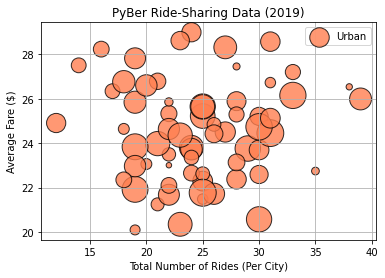

In [131]:
plt.scatter(urban_rides,urban_averagefare,s=10*urban_drivercount,
            c="coral",edgecolor="black",linewidths=1,alpha=0.8,label="Urban")
plt.title("PyBer Ride-Sharing Data (2019)")
plt.xlabel("Total Number of Rides (Per City)")
plt.ylabel("Average Fare ($)")
plt.grid(True)
plt.legend()



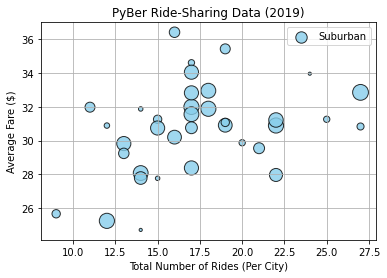

In [132]:
plt.scatter(suburban_rides,suburban_averagefare,s=10*suburban_drivercount,
           c="skyblue",edgecolor="black",linewidths=1,alpha=0.8, 
            label="Suburban")
plt.title("PyBer Ride-Sharing Data (2019)")
plt.xlabel("Total Number of Rides (Per City)")
plt.ylabel("Average Fare ($)")
plt.grid(True)
plt.legend()


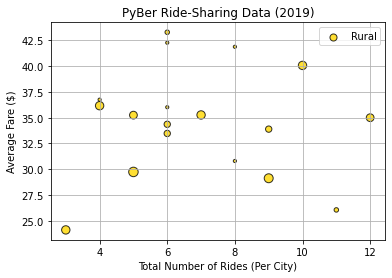

In [133]:
plt.scatter(rural_rides,rural_averagefare,s=10*rural_drivercount,
           c="gold",edgecolor="black",linewidths=1,alpha=0.8, 
            label="Rural")
plt.title("PyBer Ride-Sharing Data (2019)")
plt.xlabel("Total Number of Rides (Per City)")
plt.ylabel("Average Fare ($)")
plt.grid(True)
plt.legend()

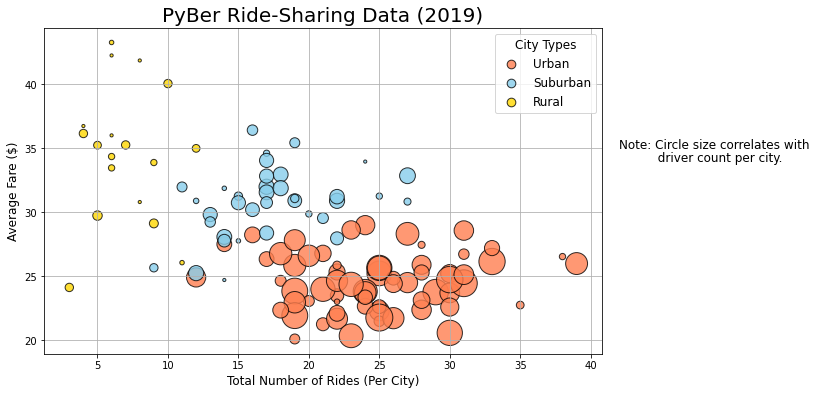

In [134]:
plt.subplots(figsize=(10,6))
plt.grid(True)
plt.scatter(urban_rides,urban_averagefare,s=10*urban_drivercount,
            c="coral",edgecolor="black",linewidths=1,alpha=0.8,label="Urban")

plt.scatter(suburban_rides,suburban_averagefare,s=10*suburban_drivercount,
           c="skyblue",edgecolor="black",linewidths=1,alpha=0.8, 
            label="Suburban")

plt.scatter(rural_rides,rural_averagefare,s=10*rural_drivercount,
           c="gold",edgecolor="black",linewidths=1,alpha=0.8, 
            label="Rural")
plt.title("PyBer Ride-Sharing Data (2019)",fontsize=20)
plt.xlabel("Total Number of Rides (Per City)",fontsize=12)
plt.ylabel("Average Fare ($)",fontsize=12)

lgnd=plt.legend(fontsize="12",mode="Expanded",scatterpoints=1,
                loc="best",title="City Types")
lgnd.legendHandles[0]._sizes = [75]
lgnd.legendHandles[1]._sizes = [75]
lgnd.legendHandles[2]._sizes = [75]
lgnd.get_title().set_fontsize(12)

plt.text(42,35,"Note: Circle size correlates with",fontsize="12")
plt.text(42,34,"          driver count per city.",fontsize="12")

plt.savefig("analysis/Fig1.png",bbox_inches='tight')
plt.show()

In [135]:
#urban_cities_df.describe()

In [136]:
#suburban_cities_df.describe()


In [137]:
#rural_cities_df.describe()

In [138]:
urban_rides.describe()

count    66.000000
mean     24.621212
std       5.408726
min      12.000000
25%      21.000000
50%      24.000000
75%      28.000000
max      39.000000
Name: ride_id, dtype: float64

In [139]:
#suburban_rides.describe()

In [140]:
#rural_rides.describe()

In [141]:
round(urban_rides.mean(),2),round(suburban_rides.mean(),2),round(rural_rides.mean(),2)

(24.62, 17.36, 6.94)

In [142]:
urban_rides.median(),urban_rides.mode(),

(24.0,
 0    22
 1    25
 dtype: int64)

In [143]:
suburban_rides.mode()

0    17
dtype: int64

In [144]:
rural_rides.mode()

0    6
dtype: int64

In [145]:
import numpy as np
import scipy.stats as sts

In [146]:
urban_rides_mean = np.mean(urban_rides)
print(f"The mean for the ride counts for urban trips is {urban_rides_mean:.2f}.")
urban_rides_median = np.median(urban_rides)
print(f"The median for the ride counts for urban trips is {urban_rides_median:.2f}.")
urban_rides_mode = sts.mode(urban_rides)
print(f"The mode for the ride counts for urban trips is {urban_rides_mode}.")

The mean for the ride counts for urban trips is 24.62.
The median for the ride counts for urban trips is 24.00.
The mode for the ride counts for urban trips is ModeResult(mode=array([22], dtype=int64), count=array([7])).


In [147]:
suburban_rides_mode = sts.mode(suburban_rides)
print(f"The mode for the ride counts for suburban trips is {suburban_rides_mode}.")

The mode for the ride counts for suburban trips is ModeResult(mode=array([17], dtype=int64), count=array([7])).


In [148]:
rural_rides_mode = sts.mode(rural_rides)
print(f"The mode for the ride counts for rural trips is {rural_rides_mode}.")

The mode for the ride counts for rural trips is ModeResult(mode=array([6], dtype=int64), count=array([5])).


In [149]:
# Get the fares for the urban cities.
urban_fares = urban_cities_df['fare']
suburban_fares = suburban_cities_df['fare']
rural_fares = rural_cities_df['fare']

In [150]:
# Calculate the measures of central tendency for the average fare for the urban cities.
urban_fares_mean = np.mean(urban_fares)
print(f"The mean fare price for urban trips is ${urban_fares_mean:.2f}.")
suburban_fares_mean = np.mean(suburban_fares)
print(f"The mean fare price for suburban trips is ${suburban_fares_mean:.2f}.")
rural_fares_mean = np.mean(rural_fares)
print(f"The mean fare price for rural trips is ${rural_fares_mean:.2f}.")

The mean fare price for urban trips is $24.53.
The mean fare price for suburban trips is $30.97.
The mean fare price for rural trips is $34.62.


In [151]:
# Get the driver count for the urban cities.
urban_drivers = urban_cities_df['driver_count']
suburban_drivers = suburban_cities_df['driver_count']
rural_drivers = rural_cities_df['driver_count']

In [152]:
# Calculate the measures of central tendency for the driver count for the urban cities.
urban_drivers_mean = np.mean(urban_drivers)
print(f"The average number of drivers in urban cities is {urban_drivers_mean:.0f}.")
suburban_drivers_mean = np.mean(suburban_drivers)
print(f"The average number of drivers in suburban cities is {suburban_drivers_mean:.0f}.")
rural_drivers_mean = np.mean(rural_drivers)
print(f"The average number of drivers in rural cities is {rural_drivers_mean:.0f}.")

The average number of drivers in urban cities is 37.
The average number of drivers in suburban cities is 14.
The average number of drivers in rural cities is 4.


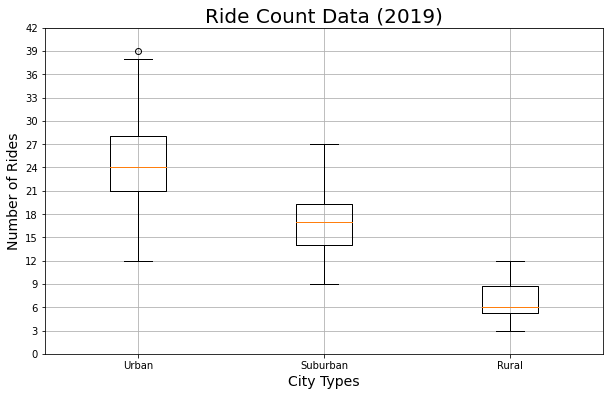

In [160]:
# Create a box-and-whisker plot for the urban cities ride count.
x_labels = ["Urban","Suburban","Rural"]
rides_data=[urban_rides,suburban_rides,rural_rides]
fig,ax = plt.subplots(figsize=(10,6))
ax.boxplot(rides_data, labels=x_labels)

# Add the title, y-axis label and grid.
ax.set_title('Ride Count Data (2019)',fontsize=20)
ax.set_ylabel('Number of Rides',fontsize=14)
ax.set_xlabel('City Types',fontsize=14)
ax.set_yticks(np.arange(0,45,step=3.0))
ax.grid()
#Save the figure.
plt.savefig('analysis/Fig2.png')
plt.show()


In [162]:
# Get the city that matches 39.
urban_city_outlier = urban_rides[urban_rides==39].index[0]
print(f"{urban_city_outlier} has the highest rider count.")

West Angela has the highest rider count.


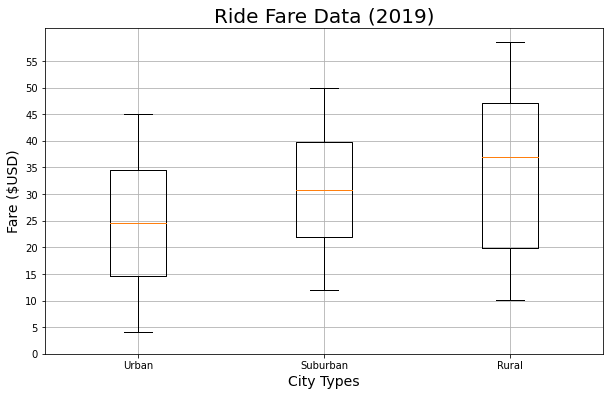

In [168]:
# Create a box-and-whisker plot for the urban,suburban, and rural fare data.
x_labels=["Urban","Suburban","Rural"]
fares_data=[urban_fares,suburban_fares,rural_fares]
fig,ax = plt.subplots(figsize=(10,6))
ax.boxplot(fares_data,labels=x_labels)

# Add the title, y-axis label and grid.
ax.set_title('Ride Fare Data (2019)',fontsize=20)
ax.set_ylabel('Fare ($USD)',fontsize=14)
ax.set_xlabel('City Types',fontsize=14)
ax.set_yticks(np.arange(0,60,step=5.0))
ax.grid()
#Save the figure.
plt.savefig('analysis/Fig3.png')
plt.show()